In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
my_colors = [u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf',
 u'#f2f2f2',            
 u'#fffa00',

 u'#b6ff9b',
 u'#005400',
 u'#ffc28c',
 u'#d69c68',
 u'#c1c1c1',
 u'#fbccff',
 u'#ff5e5e',
 u'#00edb2',
 u'#ffca1e',
 u'#933f3f']
col = ['H1','L1','L2','H3','L3','H4','L4','H5','L5','Mix 1','Mix 2','Mix 3','Mix 4',"Gv Gi Gigi and Gc mix",
"Gc partial",
"PI 510757 high N Mead H3.",
"BSB mock R1",
"Bar code BSB mock R2",
"PI505735 mock R1",
"PI505735 mock R2",
"PI297155 mock R1",
"PI297155 mock R2",
"PI510757 mock R1",
"PI510757 mock R2",
" GRASSL mock R1",
"taxon","taxon_rm_UG"]

# #Shell command write sript to get read information for OTU clustering

In [2]:
input_pwd = !ls 9*/all_cluster_*
script = open("get_header_info.sh","w")
for pwd in input_pwd:
    script.write("perl -ne 'y/@/>/;print($_.<>)&&<>&&<>' "+pwd+" | grep -n \">\" | sed 's/>//' | cut -d \":\" -f 2 > " + pwd.replace("all_cluster_","OTU").replace(".fq",".txt") + "\n")
script.close()

# # run the script

In [3]:
!chmod +x ./get_header_info.sh
!./get_header_info.sh

In [4]:
file_names = !ls 9*/OTU*.txt

TestID= list(set([a.split("/")[0] for a in file_names])) #get unique testID
TestID = sorted(TestID)

# #Function: incorporate files into OTU count table

In [5]:
def incorfiles(names):
    a = pd.read_csv(names[0],header=None)
    #a.columns = [names[0].replace(".txt","")]
    a = a.iloc[:,0].str.split("_",expand=True)
    a[3] = a[0] + '_' + a[1]
    a = a.iloc[:,[3,2]]
    a = pd.DataFrame(a.groupby(3).size())
    a.columns = [names[0].replace(".txt","")]
    for each in names[1:]:
        dft = pd.read_csv(each,header=None)
        #a.columns = [names[0].replace(".txt","")]
        dft = dft.iloc[:,0].str.split("_",expand=True)
        dft[3] = dft[0] + '_' + dft[1]
        dft = dft.iloc[:,[3,2]]
        dft = pd.DataFrame(dft.groupby(3).size())
        dft.columns = [each.replace(".txt","")]
        a = pd.merge(a,dft,left_index=True,right_index=True,how="outer")
    return a
#incorfiles([a for a in file_names if TestID[0] in a]).T

In [6]:
incorfiles([a for a in file_names if TestID[0] in a]).T

3,1st_1,1st_10,1st_11,1st_12,1st_13,1st_2,1st_3,1st_4,1st_5,1st_6,...,2nd_13,2nd_14,2nd_2,2nd_3,2nd_4,2nd_5,2nd_6,2nd_7,2nd_8,2nd_9
90_maq20/OTU0,1.0,639.0,899.0,1536.0,2797.0,3083.0,4740.0,2228.0,3958.0,3263.0,...,1447.0,1.0,1575.0,463.0,881.0,1279.0,1170.0,1292.0,882.0,1117.0
90_maq20/OTU1,NaN,1.0,1.0,NaN,NaN,10.0,1.0,13.0,NaN,3.0,...,13.0,NaN,9.0,NaN,5.0,2.0,5.0,6.0,5.0,5.0
90_maq20/OTU2,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90_maq20/OTU3,NaN,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
90_maq20/OTU4,NaN,3.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90_maq20/OTU5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90_maq20/OTU6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0
90_maq20/OTU7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
90_maq20/OTU8,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90_maq20/OTU9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


# #Function:get % tabble

In [7]:
#incorfiles([a for a in file_names if TestID[0] in a])
def get_per_tb(eachTestID):
    df = incorfiles([a for a in file_names if eachTestID in a])
    df['sort_1'] = [a[0] for a in df.index.str.split("st_|nd_")]
    df['sort_2'] = [a[1] for a in df.index.str.split("st_|nd_")]
    df = df.astype(float)
    df = df.sort_values(["sort_1","sort_2"])
    df = df.iloc[:,:-2].T
    df['sort'] = [a[1] for a in df.index.str.split("_")]
    df = df.sort_values(["sort"])
    df = df.iloc[:,:-1]
    df_per = df/df.sum()
    df_per.index = df_per.index.str.replace(eachTestID + "/","")
    df_per.index = df_per.index.str.replace("OTU","OTU_")
    return df_per
#get_per_tb(TestID[0])

In [8]:
get_per_tb(TestID[0]).columns

Index([u'1st_1', u'1st_2', u'1st_3', u'1st_4', u'1st_5', u'1st_6', u'1st_7',
       u'1st_8', u'1st_9', u'1st_10', u'1st_11', u'1st_12', u'1st_13',
       u'2nd_1', u'2nd_2', u'2nd_3', u'2nd_4', u'2nd_5', u'2nd_6', u'2nd_7',
       u'2nd_8', u'2nd_9', u'2nd_10', u'2nd_11', u'2nd_12', u'2nd_13',
       u'2nd_14'],
      dtype='object', name=3)

# #Function:get taxon columns

In [16]:
def tax_genus(pwd):
    tax1 = pd.read_csv(pwd,header=None,sep="\t",index_col=0)
    tax1 = pd.DataFrame(tax1.loc[:,1])
    tax1 = tax1[1].str.split(",",expand=True)
    for i in list(tax1.columns):
        tax1[i] = tax1[i].replace(".+unidentified.+",np.nan,regex=True)
    #tax1[tax1[5] == "None"]
    #tax1[tax1[5].isnull()]
    tax1["taxon"] = ""
    for i in tax1.columns[:-2]:
        add_tax = ~tax1.iloc[:,i].isnull()
        tax1.iloc[:,-1][add_tax] = tax1[add_tax].iloc[:,i]
        tax2 = pd.DataFrame(tax1.iloc[:,-1].str.split("(",expand=True)[0])
        tax2.columns = ["taxon"]
    return tax2


# #Function:get per and taxon table

In [19]:
def get_per_taxon_tb(eachTestID):
    tax = tax_genus(eachTestID + "/1_2_C5_sintax_rm.txt")
    tax.columns = ["taxon_unite"]
    tax_rm_Ug = tax_genus(eachTestID + "/1_2_C5_sintax_rm_unidentifiedG.txt")
    tax_rm_Ug.columns = ["taxon_unite_rmUg"]
    df_per = pd.merge(get_per_tb(eachTestID),tax,left_index=True,right_index=True,how="left")
    df_per = pd.merge(df_per,tax_rm_Ug,left_index=True,right_index=True,how="left")
    try:
        del df_per["2nd_1"]
    except Exception:
        pass
    try:
        del df_per["2nd_14"]
    except Exception:
        pass
    
    df_per.columns = col
    df_per["taxon_rm_UG"] = df_per["taxon_rm_UG"].str.replace("g:Claroideoglomus","Gc").str.replace("g:Rhizophagus","Ri").str.replace("g:Diversispora","Gv").str.replace("g:Gigaspora","Gigi") #simplify the taxon to Gv, Gigi, Ri and Gc
    return df_per
get_per_taxon_tb(TestID[9])


,H1,L1,L2,H3,L3,H4,L4,H5,L5,Mix 1,...,Bar code BSB mock R2,PI505735 mock R1,PI505735 mock R2,PI297155 mock R1,PI297155 mock R2,PI510757 mock R1,PI510757 mock R2,GRASSL mock R1,taxon,taxon_rm_UG
OTU_0,NaN,NaN,0.987696,NaN,0.928235,NaN,NaN,NaN,NaN,NaN,...,0.064857,0.001304,0.009434,0.055556,0.302395,0.004032,0.708333,0.053517,g:Paraglomus,g:Paraglomus
OTU_1,NaN,NaN,NaN,NaN,NaN,NaN,0.971347,NaN,0.009695,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f:Glomeraceae,g:Glomus
OTU_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006734,...,NaN,NaN,NaN,0.006173,NaN,NaN,NaN,NaN,g:Claroideoglomus,Gc
OTU_100,NaN,NaN,NaN,NaN,NaN,NaN,0.003438,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f:Glomeraceae,g:Glomus
OTU_101,NaN,0.006689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g:Rhizophagus,Ri
OTU_102,NaN,NaN,NaN,NaN,NaN,NaN,0.003438,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g:Rhizophagus,Ri
OTU_103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.006173,NaN,NaN,NaN,0.003058,g:Rhizophagus,Ri
OTU_104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g:Rhizophagus,Ri
OTU_105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.006173,NaN,NaN,0.001894,0.001529,g:Rhizophagus,Ri
OTU_106,NaN,NaN,NaN,NaN,NaN,0.005164,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g:Rhizophagus,Ri


# #Function: extract_known_samples_taxon table

In [20]:
def extract_known_samples_taxon(eachTestID):
    df = get_per_taxon_tb(eachTestID)
    col_known = ['H3','Mix 1','Mix 2', 'Mix 3', 'Mix 4', 'Gv Gi Gigi and Gc mix', 'Gc partial','PI 510757 high N Mead H3.','taxon','taxon_rm_UG']
    df = df.loc[:,col_known]
    df = df.loc[df.iloc[:,:7].dropna(how='all').index,:]
    return df


In [27]:
#plt.figure()
def plot_known_samples(eachTestID):
    df = extract_known_samples_taxon(eachTestID)
    df.iloc[:,:-2].T.plot(kind='bar', stacked=True,colors=my_colors,figsize=(4,4))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 4})
    plt.xticks(rotation=90)
    plt.xlabel('sample ID')
    plt.ylabel('Abundance')
    plt.plot( [4.5,4.5],[0,1.02],linestyle='-',color='k')
    plt.text(4.8, 1.01, "2nd PacBio run") 
    plt.text(1, 1.01, "1st PacBio run") 
    for j in np.arange(0,8):
        dft = df.iloc[:,[j,-1]].dropna()
        a = list(dft.iloc[:,0])
        b =[]
        dft1 = dft.copy()
        for i in np.arange(1,len(a)+1):
            b.append(sum(a[:i]))
        dft1.iloc[:,0] = b
        #dft.set_index('taxon_rm_UG')
        ind = list(dft[dft.iloc[:,0] > 0.05].index)
        dft2 = dft1.loc[ind,:]
        for y, label in zip(list(dft2.iloc[:,0]),list(dft2.iloc[:,1])):
            plt.text(j-0.5, y-0.02, label,fontsize=8,rotation='vertical')
    plt.title("OTUs clustering > 5 passes " + eachTestID.replace("_maq20","%_identity"))
    return plt.savefig(eachTestID + "_plot.png", bbox_inches='tight')
#plot_known_samples(TestID[0])



In [28]:
TestID[0]

'90_maq20'

IndexError: list index out of range

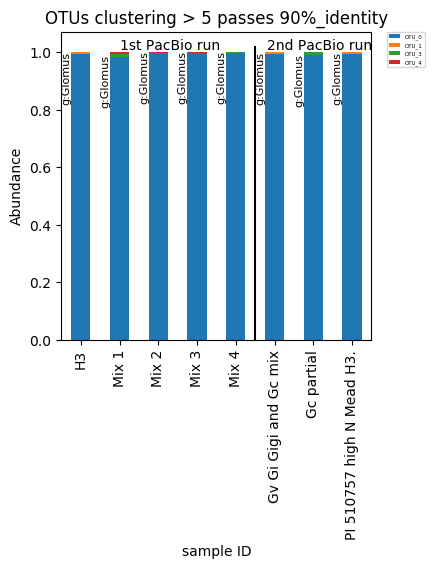

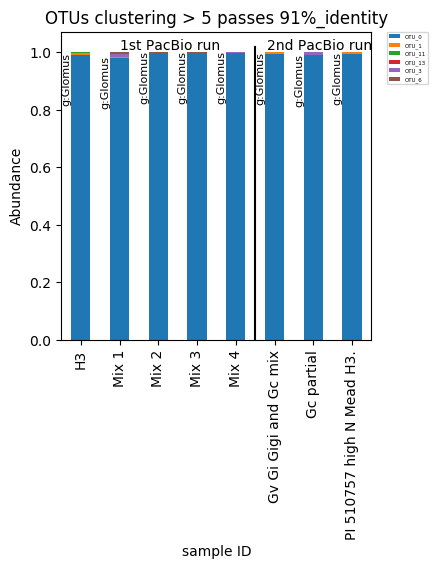

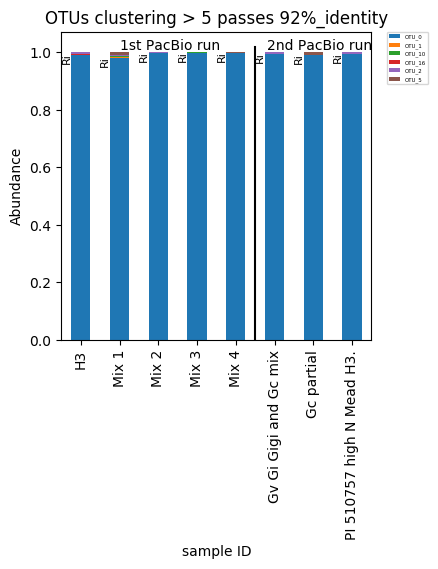

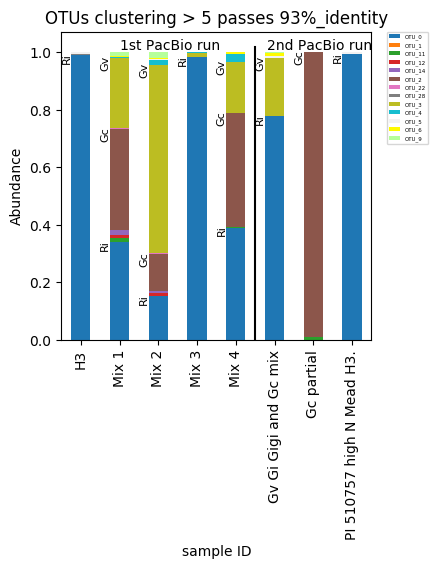

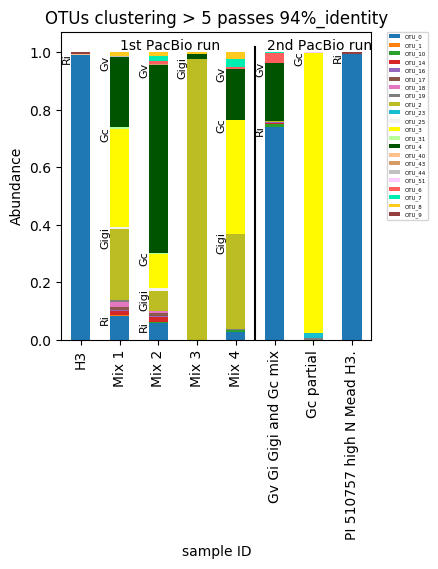

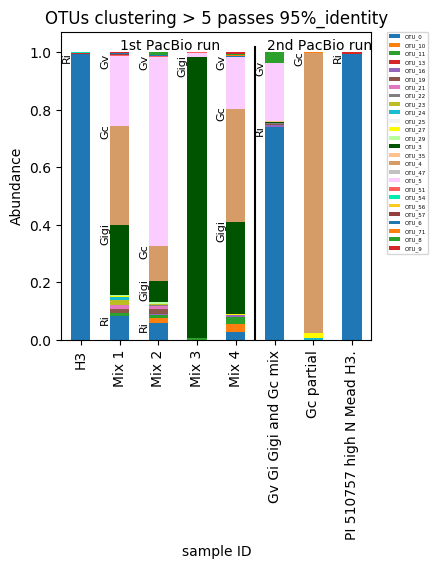

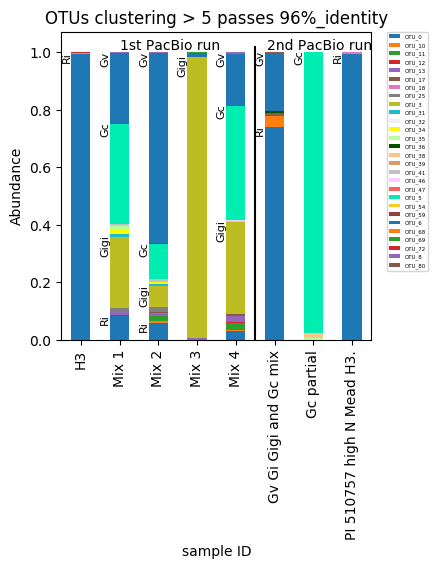

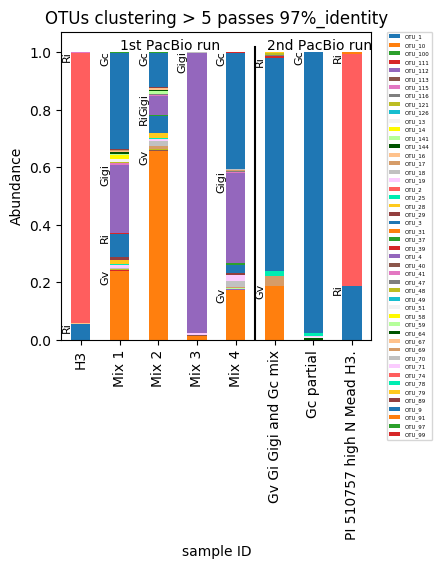

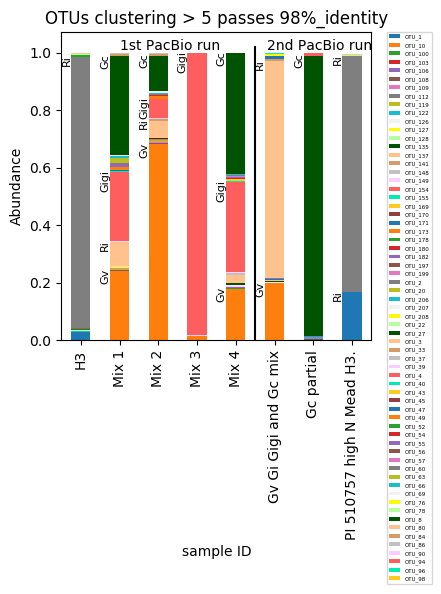

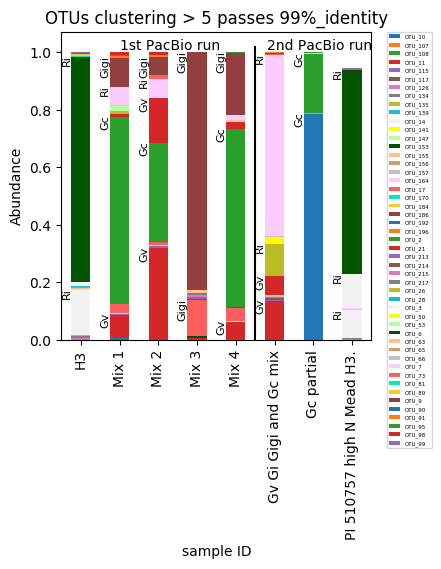

In [29]:
#order = list(np.arange(1,11))


plot_known_samples(TestID[0])
plot_known_samples(TestID[1])
plot_known_samples(TestID[2])
plot_known_samples(TestID[3])
plot_known_samples(TestID[4])
plot_known_samples(TestID[5])
plot_known_samples(TestID[6])
plot_known_samples(TestID[7])
plot_known_samples(TestID[8])
plot_known_samples(TestID[9])
